# 상품명 워드클라우드
### 가설 : 상품명에서 분위기 단어를 선정할 수 있다.
### <aside>💡오늘의 분석 목표
- 앞서 집들이 글에 태깅된 상품의 분위기를 모두 부여하였다. 앞으로 태깅되지 않은 모든 상품에 분위기를 부여해야 한다. 이를 위해, 상품명에서 각 분위기를 선정할 수 있는 단어가 존재하는지 그 여부를 확인해야 한다. 따라서, 이미 분위기가 부여된 상품의 상품명 분석을 통하여 상품명으로도 분위기를 설정할 수 있는지 확인하고, 나아가 상품명으로 태깅되지 않은 상품의 분위기를 설정할 수 있는지 확인한다.
- 집들이 글의 제목과 그 안에 태깅된 상품의 상품명 단어 비교, 공통 단어가 있는지 확인한다.
- 특정 분위기(한국&아시아)의 '집들이 제목'과 '상품명'의 공통 단어가 있는지의 여부를 워드클라우드를 통해 확인한다.

### <aside>💡결과
상품명
- 한국&아시아 분위기의 상품이어서 그런지, '베크', '원목', '호두나무' 등의 단어 빈도가 높게 나왔다.

### <aside>💡결론
- 상품명에서 분위기를 특정할 수 있는 단어를 추출하기 어렵다.
- 상품명에는 기능적인 단어(예:접이식), 소재(예:원목,나무)가 많이 포함되어 있다.
- 앞으로, 태깅되지 않은 상품의 분위기는 상품명으로 정의내릴 수 없을 것이다.

### <aside>💡앞으로의 목표
- 다른 텍스트 스크래핑이 필요하다.
- 리뷰에서 분위기 단어를 추출해보자.
- 기대효과 : 집들이에 태깅되지 않은 모든 상품들도 분위기를 부여할 수 있다.

# 데이터 불러오기
- 집들이 + 상품 병합 데이터

In [17]:
import pandas as pd
pd.options.display.max_columns = None

merge = pd.read_csv("merge.csv")
merge.head(n=2)

,Unnamed: 0.1,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url_x,Unnamed: 0,url_y,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수
0,0,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0,10513,136,57,15,https://ohou.se/projects/126917/detail?affect_...,0,https://ohou.se/productions/538782/selling,에어론,리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),"['가구', '테이블·식탁·책상', '책상', '일반책상']",39800.0,2891.0,57140.0,2113.0
1,1,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0,10513,136,57,15,https://ohou.se/projects/126917/detail?affect_...,1,https://ohou.se/productions/803775/selling,베네베네,벤트라이크 멀티플 접이식 세발자전거+안전가드,"['유아·아동', '완구·교구', '공간·대형완구']",94800.0,1.0,60.0,1.0


## 1. 집들이 탭 데이터 파악하기

In [3]:
merge['스타일'].unique() # 스타일 확인

array(['내추럴', '모던', '빈티지&레트로', '클래식&앤틱', '0', '러블리&로맨틱', '프렌치&프로방스',
       '유니크&믹스매치', '한국&아시아', '북유럽', '미니멀&심플', '인더스트리얼', '미니멀&심플, 내추럴',
       '내추럴, 한국&아시아', '모던, 빈티지&레트로', '내추럴, 빈티지&레트로', '내추럴, 북유럽',
       '모던, 내추럴', '빈티지&레트로, 러블리&로맨틱', '모던, 클래식&앤틱', '빈티지&레트로, 한국&아시아',
       '내추럴, 러블리&로맨틱', '모던, 유니크&믹스매치', '모던, 미니멀&심플', '프렌치&프로방스, 러블리&로맨틱',
       '모던, 러블리&로맨틱', '내추럴, 프렌치&프로방스', '북유럽, 러블리&로맨틱', '북유럽, 빈티지&레트로',
       '미니멀&심플, 빈티지&레트로', '클래식&앤틱, 유니크&믹스매치', '내추럴, 유니크&믹스매치', '모던, 북유럽',
       '러블리&로맨틱, 유니크&믹스매치', '미니멀&심플, 북유럽', '내추럴, 클래식&앤틱',
       '한국&아시아, 유니크&믹스매치', '빈티지&레트로, 클래식&앤틱', '미니멀&심플, 클래식&앤틱',
       '빈티지&레트로, 유니크&믹스매치', '북유럽, 유니크&믹스매치', '미니멀&심플, 유니크&믹스매치',
       '모던, 내추럴, 북유럽', '모던, 프렌치&프로방스', '모던, 내추럴, 러블리&로맨틱',
       '미니멀&심플, 러블리&로맨틱', '모던, 내추럴, 러블리&로맨틱, 유니크&믹스매치', '모던, 미니멀&심플, 내추럴',
       '미니멀&심플, 내추럴, 빈티지&레트로, 인더스트리얼, 유니크&믹스매치', '모던, 미니멀&심플, 러블리&로맨틱',
       '빈티지&레트로, 한국&아시아, 유니크&믹스매치', '모던, 미니멀&심플, 내추럴, 빈티지&레트로, 한국&아시아',
       '모던, 미니멀&심플, 한국&아시아', '빈티지&레트로, 클

### 1.1. 신혼부부 집들이 탭 스타일 분석
- 결과 : 신혼부부 글에는 '내추럴' 스타일이 많다.

In [30]:
# 신혼부부 글 중 가장 많이 나오는 스타일
merge['스타일'].groupby(merge['가족형태']=='신혼부부').value_counts()

가족형태   스타일                         
False  내추럴                             40642
       모던                              24087
       0                               18592
       빈티지&레트로                          6379
       미니멀&심플, 내추럴                      5456
                                       ...  
True   미니멀&심플, 내추럴, 북유럽, 빈티지&레트로          25
       빈티지&레트로, 한국&아시아, 유니크&믹스매치          22
       모던, 미니멀&심플, 프렌치&프로방스               19
       내추럴, 클래식&앤틱, 러블리&로맨틱               17
       내추럴, 빈티지&레트로, 클래식&앤틱, 한국&아시아       13
Name: 스타일, Length: 257, dtype: int64

### 1.2. 가족형태(신혼부부) & 스타일(한국&아시아)
- 모든 가족형태에 빈도수가 가장 많은 '내추럴', '모던', '미니멀&심플'을 제외
- 특색있는 분위기인 '한국&아시아' 스타일 확인하기

In [26]:
marry_kor = merge[(merge['가족형태'] == '신혼부부') & (merge['스타일'] == '한국&아시아')]
marry_kor.head(n=2)

,Unnamed: 0.1,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url_x,Unnamed: 0,url_y,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수
4472,4472,63,2022-10-01,평온재| 비우고 아끼며 몸과 마음의 에너지를 얻는 곳,신혼부부,아파트,55,한국&아시아,0,홈스타일링,셀프•DIY,0,14252,255,91,20,https://ohou.se/projects/123530/detail?affect_...,4472,https://ohou.se/productions/897661/selling,무드선셋,"엘더우드 원목 프레임 액자 A3 , A2","['데코·식물', '홈갤러리', '액자']",49900.0,NaN,112.0,2.0
4473,4473,63,2022-10-01,평온재| 비우고 아끼며 몸과 마음의 에너지를 얻는 곳,신혼부부,아파트,55,한국&아시아,0,홈스타일링,셀프•DIY,0,14252,255,91,20,https://ohou.se/projects/123530/detail?affect_...,4473,https://ohou.se/productions/236361/selling,모리앤,사랑하기때문에 비누꽃 조화 꽃다발,"['데코·식물', '플라워·식물', '꽃다발·플라워박스', '꽃다발']",16900.0,7.0,123.0,3.0


In [11]:
# 브랜드명 counts
import sys
from collections import Counter

Counter(marry_kor['브랜드명']).most_common() # 이케아가 가장 많음 -> 이케아 상품 분석

[('이케아', 31),
 ('마켓비', 7),
 ('LG전자', 7),
 ('꾸미까', 6),
 ('광주요', 6),
 ('데코뷰', 5),
 ('삼성전자', 5),
 ('안제이', 5),
 ('블랑드엔젤', 5),
 ('웨스트엘름westelm', 4),
 ('헤이라라', 4),
 ('까르다', 3),
 ('메이드모드', 3),
 ('마이플랜트', 3),
 ('몬세라믹', 3),
 ('트렌데코', 3),
 ('더죤테크', 3),
 ('고르소', 3),
 ('웜그레이테일', 3),
 ('잭슨카멜레온', 3),
 ('시스디자인', 3),
 ('엘레나하임', 3),
 ('스몰스터프', 2),
 ('밍이네가든', 2),
 ('위니아', 2),
 ('까사라이트', 2),
 ('딥디크', 2),
 ('발뮤다', 2),
 ('페르몹', 2),
 ('제네바사운드', 2),
 ('컷코', 2),
 ('아는친구네', 2),
 ('샤오미', 2),
 ('아침향기', 2),
 ('THE살림', 2),
 ('에코상사', 2),
 ('유어그라피', 2),
 ('Theposterclub', 2),
 ('무인양품', 2),
 ('자라홈', 2),
 ('쓰임', 2),
 ('웨스트엘름', 2),
 ('이솝', 2),
 ('LG케어솔루션', 2),
 ('PLOTICA', 2),
 ('Fatboy', 2),
 ('리본제이', 2),
 ('네스프레소', 2),
 ('벤자민무어', 2),
 ('한샘', 2),
 ('블루밍앤미', 2),
 ('데로마', 2),
 ('postershopkr', 2),
 ('하일리힐즈', 2),
 ('몬트레소르', 2),
 ('데일리오브젝트', 2),
 ('무드선셋', 1),
 ('모리앤', 1),
 ('스피아노', 1),
 ('트위그뉴욕', 1),
 ('힘펠', 1),
 ('아임플라워', 1),
 ('집단장', 1),
 ('호담', 1),
 ('니은기억', 1),
 ('솔빈이네액자가게', 1),
 ('시라쿠스', 1),
 ('CARLHANSEN&SON', 1),
 

In [27]:
# 스타일 상관관계 구하기
style_dummies.corr()

,모던,미니멀&심플,내추럴,북유럽,빈티지&레트로,클래식&앤틱,프렌치&프로방스,러블리&로맨틱,인더스트리얼,한국&아시아,유니크&믹스매치,모미내
모던,1.000000,0.711853,0.820646,0.551023,0.544568,0.343380,0.250485,0.369623,0.168131,0.265920,0.519603,0.919648
미니멀&심플,0.711853,1.000000,0.761679,0.599383,0.542052,0.386971,0.248383,0.384770,0.180451,0.290445,0.455733,0.852866
내추럴,0.820646,0.761679,1.000000,0.612398,0.672407,0.394986,0.289614,0.458567,0.158323,0.324234,0.545000,0.966012
북유럽,0.551023,0.599383,0.612398,1.000000,0.511326,0.348272,0.256475,0.348342,0.164518,0.234788,0.455710,0.635635
빈티지&레트로,0.544568,0.542052,0.672407,0.511326,1.000000,0.465640,0.283345,0.451124,0.182981,0.306239,0.510128,0.653424
클래식&앤틱,0.343380,0.386971,0.394986,0.348272,0.465640,1.000000,0.273165,0.290070,0.144003,0.211433,0.294807,0.406053
프렌치&프로방스,0.250485,0.248383,0.289614,0.256475,0.283345,0.273165,1.000000,0.238410,0.085682,0.143276,0.219423,0.289873
러블리&로맨틱,0.369623,0.384770,0.458567,0.348342,0.451124,0.290070,0.238410,1.000000,0.100096,0.175115,0.337338,0.448207
인더스트리얼,0.168131,0.180451,0.158323,0.164518,0.182981,0.144003,0.085682,0.100096,1.000000,0.088083,0.163118,0.178229
한국&아시아,0.265920,0.290445,0.324234,0.234788,0.306239,0.211433,0.143276,0.175115,0.088083,1.000000,0.226682,0.322295


# 2. 상품별 분위기 데이터
- 상품 데이터에 분위기 데이터 merge
- (* 분위기 데이터 : 집들이 탭의 스타일로 태깅된 상품에 분위기를 부여하였음)

In [2]:
mood = pd.read_csv('prd_mood_fixed.csv')
mood

,Unnamed: 0,상품명,분위기
0,0,리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),모미내
1,1,벤트라이크 멀티플 접이식 세발자전거+안전가드,모미내
2,2,FLENSTED MOBILES 모빌 - 천사 Angel mobile,모미내
3,3,경추목 메모리폼 숙면 꿀잠 수면 베개_항균탠샐,모미내
4,4,리스 클래식 법랑 양수냄비 22cm(H),모미내
...,...,...,...
100098,100098,"[해외]Philips 'Romeo' Table Lamp, 1960s",유니크&믹스매치
100099,100099,실크스크린 아트포스터 3종 Journey Collection 01-03,유니크&믹스매치
100100,100100,HUSVIKA 후스비카 스프링매트리스 603.188.64,유니크&믹스매치
100101,100101,악세스시리즈01 한정판 아트포스터,유니크&믹스매치


In [3]:
# 데이터 전처리
mood.drop('Unnamed: 0', axis = 1) 

,상품명,분위기
0,리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),모미내
1,벤트라이크 멀티플 접이식 세발자전거+안전가드,모미내
2,FLENSTED MOBILES 모빌 - 천사 Angel mobile,모미내
3,경추목 메모리폼 숙면 꿀잠 수면 베개_항균탠샐,모미내
4,리스 클래식 법랑 양수냄비 22cm(H),모미내
...,...,...
100098,"[해외]Philips 'Romeo' Table Lamp, 1960s",유니크&믹스매치
100099,실크스크린 아트포스터 3종 Journey Collection 01-03,유니크&믹스매치
100100,HUSVIKA 후스비카 스프링매트리스 603.188.64,유니크&믹스매치
100101,악세스시리즈01 한정판 아트포스터,유니크&믹스매치


## 2.1. 데이터 병합하기
- 집들이 + 상품 분위기가 포함된 상품 데이터

In [6]:
# 상품명 기준으로 merge
merge2 = pd.merge(merge,mood, how = 'inner',on = '상품명')

- 집들이 '스타일' 탭 삭제 
- 상품의 '분위기'가 기준, 집들이 탭과 상품의 분위기 통일하기
- 즉, 집들이 '스타일' -> 상품 '분위기'

In [25]:
 merge2.drop('스타일', axis=1) # 집들이 '스타일' 컬럼 삭제
merge2.head(n=1)

,Unnamed: 0.1,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url_x,Unnamed: 0_x,url_y,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수,Unnamed: 0_y,분위기
0,0,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0,10513,136,57,15,https://ohou.se/projects/126917/detail?affect_...,0,https://ohou.se/productions/538782/selling,에어론,리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),"['가구', '테이블·식탁·책상', '책상', '일반책상']",39800.0,2891.0,57140.0,2113.0,0,모미내


In [76]:
merge2['분위기'].unique() # 확인

array(['모미내', '유니크&믹스매치', '한국&아시아', '빈티지&레트로', '러블리&로맨틱', '프렌치&프로방스',
       '클래식&앤틱', '북유럽', '인더스트리얼'], dtype=object)

In [18]:
# 신혼부부 글 중 가장 많이 나오는 분위기
merge2['분위기'].groupby(merge2['가족형태']=='신혼부부').value_counts()

가족형태   분위기     
False  모미내         58509
       유니크&믹스매치    14609
       빈티지&레트로     14402
       러블리&로맨틱     13437
       북유럽          9664
       프렌치&프로방스     8482
       클래식&앤틱       8363
       한국&아시아       7708
       인더스트리얼       4903
True   모미내         48047
       유니크&믹스매치     9421
       빈티지&레트로      8583
       러블리&로맨틱      7984
       북유럽          7732
       한국&아시아       6332
       프렌치&프로방스     5935
       클래식&앤틱       5835
       인더스트리얼       3073
Name: 분위기, dtype: int64

- 결과 : 모미내 >> 유니크&믹스매치 > 빈티지&레트로

## 2.2. 가족형태(신혼부부) & 분위기(한국&아시아)
#### 가설 : 신혼부부에게 한국&아시아 분위기의 상품 추천이 가능할 것이다.
- 목표 : 신혼부부 집들이 선물하기 
- 하나의 분위기 선택 -> 상품명 분위기 분석


In [22]:
marry_kor2 = merge2[(merge2['가족형태'] == '신혼부부') & (merge2['분위기'] == '한국&아시아')]
marry_kor2.head(n=2)

,Unnamed: 0.1,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url_x,Unnamed: 0_x,url_y,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수,Unnamed: 0_y,분위기
34,54514,861,2022-05-20,"음악가 부부의 이야기가 담긴, 창밖 뷰가 예쁜 집",신혼부부,아파트,35,모던,0,리모델링,전문가,8000,16921,250,54,25,https://ohou.se/projects/96874/detail?affect_t...,54514,https://ohou.se/productions/516421/selling,페페무드,돔 캔들 (3size),"['데코·식물', '캔들·디퓨저', '캔들', '캔들']",14500.0,17.0,189.0,16.0,12,한국&아시아
152,1980,28,2022-10-07,부드러운 내추럴 톤에 블랙 포인트가 편안한 집,신혼부부,아파트,35,0,0,부분공사,전문가,3000,7129,145,57,26,https://ohou.se/projects/126401/detail?affect_...,1980,https://ohou.se/productions/579185/selling,디트리쉬,[해외] 디트리쉬 인덕션 DPI7686WP / 배송비+관부가세 포함,"['가전', '주방가전', '가스레인지·인덕션', '인덕션']",1079000.0,36.0,2823.0,212.0,51,한국&아시아


In [98]:
marry_kor2.count() # 6332개

Unnamed: 0.1    6332
id              6332
작성일             6332
제목              6332
가족형태            6332
공간              6332
평수구간            6332
스타일             6332
세부공사            6332
분야              6332
작업              6332
예산              6332
조회              6332
스크랩             6332
좋아요             6332
댓글              6332
url_x           6332
Unnamed: 0_x    6332
url_y           6332
브랜드명            6332
상품명             6332
카테고리            6332
상품가격            4663
리뷰수             4606
스크랩수            6329
스타일링샷수          6332
Unnamed: 0_y    6332
분위기             6332
dtype: int64

In [13]:
#브랜드명 counts
import sys
from collections import Counter

Counter(marry_kor2['브랜드명']).most_common() # 이케아가 가장 많음 -> 이케아 상품 분석

[('이케아', 645),
 ('삼성전자', 209),
 ('LG전자', 199),
 ('이솝', 159),
 ('밍이네가든', 141),
 ('솔빈이네액자가게', 124),
 ('일리', 111),
 ('롬버스', 104),
 ('마켓비', 90),
 ('융', 73),
 ('르그랑코리아', 69),
 ('드롱기', 68),
 ('무인양품', 65),
 ('아메리칸스탠다드', 59),
 ('더죤테크', 55),
 ('네스프레소', 53),
 ('꾸미까', 47),
 ('잭슨카멜레온', 47),
 ('마이플랜트', 47),
 ('GAKYU', 45),
 ('Aesop(이솝)', 44),
 ('데스커', 44),
 ('라이크하우스', 42),
 ('데코뷰', 41),
 ('안제이', 41),
 ('공간LED', 38),
 ('류블류샵', 35),
 ('트렌데코', 33),
 ('제일전기공업', 32),
 ('픽홈', 32),
 ('마샬', 32),
 ('라디룸', 32),
 ('아르테미데', 31),
 ('sk매직', 30),
 ('웜그레이테일', 30),
 ('시디즈', 30),
 ('힘펠', 29),
 ('마틸라', 28),
 ('키친몰링', 27),
 ('코지테이블', 27),
 ('샤오미', 27),
 ('오션글라스', 27),
 ('빌레로이앤보흐', 27),
 ('오투가구', 27),
 ('도잠', 26),
 ('탁가온', 26),
 ('영가구', 26),
 ('메이드모드', 25),
 ('아라크네', 25),
 ('우드레이', 25),
 ('아르네야콥센', 24),
 ('1401home', 24),
 ('에이블밤부', 24),
 ('프랑코', 23),
 ('모슈', 23),
 ('장미맨숀', 23),
 ('네이쳐리빙', 23),
 ('블랑데코', 22),
 ('필플랜트', 22),
 ('Artek', 22),
 ('비스비바', 22),
 ('보토', 22),
 ('&tradition', 20),
 ('L&Cstendal', 20),
 ('고미플라워',

- 결과 : 이케아 상품이 가장 많다.
#### 가설 : 이케아 상품에 분위기가 잘 드러나는 단어가 많이 있을 것이다.

## 2.3. 이케아 상품 제목 분석

In [21]:
# 이케아 상품 제목 분석 
prd_ikea = marry_kor2[(marry_kor2['브랜드명']=='이케아') & (marry_kor2['상품명'])]
prd_ikea.head(n=2)

,Unnamed: 0.1,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url_x,Unnamed: 0_x,url_y,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수,Unnamed: 0_y,분위기
1574,143,1,2022-10-07,"구축 2Bay 리모델링의 바이블, 모던한 32평 신혼집",신혼부부,아파트,35,모던,"주방리모델링, 조명시공, 중문, 가벽&파티션, 슬라이딩도어",리모델링,전문가,4200,5610,75,26,12,https://ohou.se/projects/126600/detail?affect_...,143,https://ohou.se/productions/153841/selling,이케아,MULIG 옷걸이 행거,"['가구', '행거·옷장', '행거', '스탠드행거']",18500.0,2312.0,38925.0,1722.0,143,한국&아시아
1576,13055,190,2022-09-05,늘 신혼처럼💕 공간과 구조를 바꾸며 재미나게 살아요,신혼부부,아파트,25,모던,0,홈스타일링,셀프•DIY,0,14293,248,56,8,https://ohou.se/projects/117040/detail?affect_...,13055,https://ohou.se/productions/153841/selling,이케아,MULIG 옷걸이 행거,"['가구', '행거·옷장', '행거', '스탠드행거']",18500.0,2314.0,38979.0,1725.0,143,한국&아시아


In [122]:
# 신혼부부, 한국&아시아, 이케아 상품 제목 개수
prd_ikea.loc[:,'상품명'].nunique() # 136개

136

In [124]:
list(prd_ikea.loc[:,'상품명'].unique())

['MULIG 옷걸이 행거',
 'VALLÖBY 발뢰뷔 단모러그, 베이지, 블루',
 '스코디스 페그 보드 타공판 메모판 3size (나사못.칼브럭 증정)',
 'PS 철재 캐비넷 수납장 5colors',
 'LÄMPLIG 렘플리그 도마, 대나무, 46x53 cm',
 'KUNGSFORS 쿵스포르스 자석클립, 스테인리스 3개',
 'CISSAN 냅킨꽂이 겸 수납바구니',
 'LACK 벽선반 유닛',
 'LAGKAPTEN 테이블(120X60)+ADILS 기본다리세트',
 'SMYCKA 스뮈카 인조나뭇잎 유칼립투스 65cm',
 'TEODORES 화이트 703.509.38',
 'SÄLLSKAPLIG 셀스카플리그',
 'STOCKHOLM 거울, 호두나무무늬목',
 'BERGENES 베리에네스 휴대폰/태블릿홀더',
 'ALEFJÄLL 알레피엘 사무용의자, 그란 골드브라운',
 '스쿠브 수납박스 언더베드 침대밑 정리함 이불 옷 3size',
 'LERBERG 슬림 철제 선반 유닛 2colors',
 'IKEA 365+ 유리병 마개, 유리, 코르크',
 'HAVSEN 하브센 전면 노출형 싱크볼2, 화이트',
 'PAX 팍스 옷장, 화이트, 하스비크 화이트, 150*66*201 cm',
 'NORDMYRA 의자',
 'STALL 4칸 신발장',
 '호브스타 원목 표구 액자 6size / 3colors',
 'SNAJDARE 스나이다레 벽시계 28cm 무소음',
 'TERTIAL 단스탠드/작업등 E26 2colors',
 'PAX 팍스 옷장, 화이트',
 '(안전포장) BOJA 뵈야 대나무 라탄 테이블스탠드',
 '베크뱀 원목 안전계단 스텝스툴 3colors',
 'FRACK 스테인리스 001.819.82',
 'FÖRHÖJA 푀르회야 주방카트, 자작나무',
 'TERJE 접의식 의자 5colors (에어캡포장 추가가능)',
 'BEGRIPA 베그리파 손잡이 3colors',
 'SKOGSTA 스콕스타 아카시아나무 스툴 45cm',
 'SORTSÖ 소르트쇠 평직러그, 미표

## 2.4. 신혼부부, 한국&아시아 -> 이케아 상품 집들이 제목 분석
- 목표 : 한국&아시아 분위기의 상품에서 이케아(브랜드) 상품이 가장 많았다. 이케아 상품명에서 한국&아시아 분위기를 대표할 수 있는 단어를 추출해보자.

In [128]:
prd_ikea['제목'].head(20) 

1574    구축 2Bay 리모델링의 바이블, 모던한 32평 신혼집
1576      늘 신혼처럼💕 공간과 구조를 바꾸며 재미나게 살아요
1582    구조의 한계 극복! 모던과 내추럴이 적절히 섞인 신혼집
1586    오늘은 어디에 둘까? 가구 배치로 계속 변화하는 신혼집
1588      간결한 공간 속 싱그러움과 포근함을 간직한 스윗 홈
1590    시공없이 싱그럽게, 베이지톤 신혼집의 사계절 플랜테리어
1592    리모델링 후 2년 사이의 변화, 더 포근해진 화이트 홈
1594      화이트 우드 속 초록초록 포인트💚 20평대 신혼집!
1595    포스터&그림으로 느낌 있게! 부부의 정갈한 심플 하우스
1596     하나씩 모은 빈티지 가구로 채운, 짙은 우드향 신혼집
1597     영끌 새댁의 깔끔하고 모던한 20평대 신혼집 리모델링
1598         스타일링으로 따뜻한 신혼집이 된 오래된 아파트
1601    우리만의 특별한 DIY 인테리어, 그리고 미니멀 라이프
1604        고양이가 있는 신혼부부의 우드 앤 화이트 하우스
1608    카페 인테리어 경험을 살려서! 모던&빈티지 컨셉 신혼집
1612       따뜻하고 단정한 첫 신혼집, 24평 복도식 아파트
1621     부분 공사로 완성한 우리의 로망 | 26평 첫 신혼집
1622           "조금이라도 집을 바꾸니 삶이 달라지네요"
1623       아파트에 담은 한옥 로망, '정고재' 속 신혼부부
3534     손 뻗으면 닿을 듯한 녹음🌳 싱그러운 저층집 리모델링
Name: 제목, dtype: object

In [150]:
# word count
import sys
from collections import Counter

Counter(prd_ikea['제목']).most_common() # 중복 제거

[('"조금이라도 집을 바꾸니 삶이 달라지네요"', 19),
 ('어서와, 90년대 K-주택은 처음이지?', 16),
 ('오래된 아파트 내 손으로 직접 리모델링 하다', 11),
 ("'하나부터 열까지' 정성 들인 미니멀 신혼집", 7),
 ('여행지에서의 영감을 담아 이케아로 꾸민 화이트 인테리어', 5),
 ('고물과 보물사이, 취향과 안목이 깃든 빈티지 아파트', 5),
 ('반려동물들과 함께 하는 아늑한 외국살이', 4),
 ('체리몰딩, 꼭 없애야만 할까요? 아날로그 감성 신혼집', 4),
 ('기본에 충실한 구축 리모델링! 깔끔한 화이트톤 신혼집', 4),
 ('조화와 함께 풍성하게 완성한 신혼집 플랜테리어', 4),
 ('30대 동갑내기 부부가 함께 이룬 전원생활 라이프', 4),
 ('식물집사와 미니멀리스트, 그 어딘가를 향한 여정', 4),
 ('작은 집도 예쁘게, 도자기 감성을 담은 12평 신혼집', 4),
 ('화이트의 심플함과 우아함을 살려 만든 집 ', 4),
 ('푸른 공원이 보이는 베란다 홈 카페가 있는 곳 ', 4),
 ('색다른 소품으로 더하는 나만의 색', 3),
 ('마당과 다락방을 품은, 부부의 아늑한 3층 단독주택', 3),
 ('구축 리모델링의 정석! 화이트우드 인테리어를 꿈 꾼다면', 3),
 ('바다와 밤의 빛을 가득 품을 수 있는, 미니멀한 공간', 3),
 ('월넛과 옐로우로 따뜻하고 편안하게 꾸민 20평대 신혼집', 3),
 ('따로 또 같이 편안한 공간을 꿈 꾼 우리의 두번째 집', 3),
 ('창 밖으로 과수원을 품은 집에서, 평온한 제주살이', 3),
 ('부부의 로망을 한껏 담아 시공한 둘만의 간결한 집', 3),
 ('동남아 어딘가처럼 여유롭고 아늑하도록, 우리의 복층집', 3),
 ('산 아래, 우리가 만들어가는 작은 세계', 3),
 ('주어진 상황 안에서 현명하게 :) 디자이너의 신혼집', 3),
 ('"종탑이 보이는 집에 살고 있어요"', 3),
 ('오래된 작은 집도 예뻐질 수 있어요, 21평

# 3. 워드 클라우드
- 집들이 제목 & 상품명 
- '집들이 제목'과 '상품명'사이의 공통 단어가 있는지 워드클라우드를 통해 확인한다.

## 워드 클라우드 함수 정의

In [154]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def displayWordCloud(data = None, backgroundcolor = 'white', width=1600, height=800):
#    mask = np.asarray(Image.open('./home.png').convert('L'))            # 워드클라우드에 적용할 이미지
                    
    wordcloud = WordCloud(
                        font_path = 'NanumGothic.ttf',                  # 폰트 설정
                        stopwords = STOPWORDS,                          # 불용어 제거
                        background_color = backgroundcolor,             # # 배경색 설정 
                        # max_words = 100,                                # 단어가 많이 나오면 복잡하니까 최대 100개만 보게 설정
                        #mask=mask,                                      # 워드클라우드에 적용할 이미지
                        width = width, height = height).generate(data)  # 크기 설정
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

## 토크나이저 함수 정의

In [136]:
from konlpy.tag import Okt
okt = Okt()

In [15]:
# 예시
text = "시간이 닿은 숲, 정다운 한옥 시골집을 고쳐 살아요" 

In [137]:
title_nouns = okt.nouns(text)
title_nouns

['시간', '숲', '정다운', '옥', '시골', '집']

In [138]:
title_morphs = okt.morphs(text)
title_morphs

['시간', '이', '닿은', '숲', ',', '정다운', '한', '옥', '시골', '집', '을', '고쳐', '살아요']

In [139]:
title_pos = okt.pos(text)
title_pos

[('시간', 'Noun'),
 ('이', 'Josa'),
 ('닿은', 'Verb'),
 ('숲', 'Noun'),
 (',', 'Punctuation'),
 ('정다운', 'Noun'),
 ('한', 'Determiner'),
 ('옥', 'Noun'),
 ('시골', 'Noun'),
 ('집', 'Noun'),
 ('을', 'Josa'),
 ('고쳐', 'Verb'),
 ('살아요', 'Verb')]

In [140]:
def title_wordcloud(text):
    title_keyword = []
    title_pos = okt.pos(''.join(text)) # 품사 태깅
    
    for x,y in title_pos:
        if y in ['Noun', 'Adjective']: # 뽑아낼 품사
            if len(x) > 1:                        # 단어의 길이가 1이면 제거
                title_keyword.append(x)
    displayWordCloud(' '.join(title_keyword))     # 워드 클라우드 그리기

## 불용어 사전 만들기

In [152]:
# 불용어 사전을 가져와서 set으로 변환
file_path = '/Users/joy/stopwords-ko.txt'

with open(file_path, encoding='utf-8') as f:
    stopwords = f.readlines()

STOPWORDS = {line.rstrip('\n') for line in stopwords}
# STOPWORDS

In [164]:
stopwords_add = {'아파트', '인테리어', '공간', '있는', '신혼집', '주택', '하우스', '리모델링', '취향','부부','시공','모델링','구축','오래된'} # 워드 클라우드 그려보면서 불용어 계속 추가
for word in stopwords_add:
    STOPWORDS.add(word)
# STOPWORDS

## 워드 클라우드 그리기
- 집들이 제목(한국&아시아)과 상품명(이케아)의 공통 단어가 있는지 워드클라우드를 통해 확인한다.

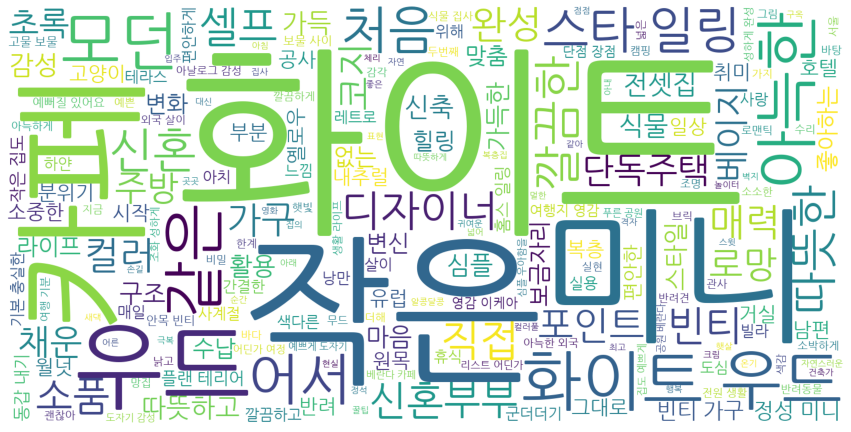

In [165]:
title_wordcloud(prd_ikea['제목']) # 집들이 제목

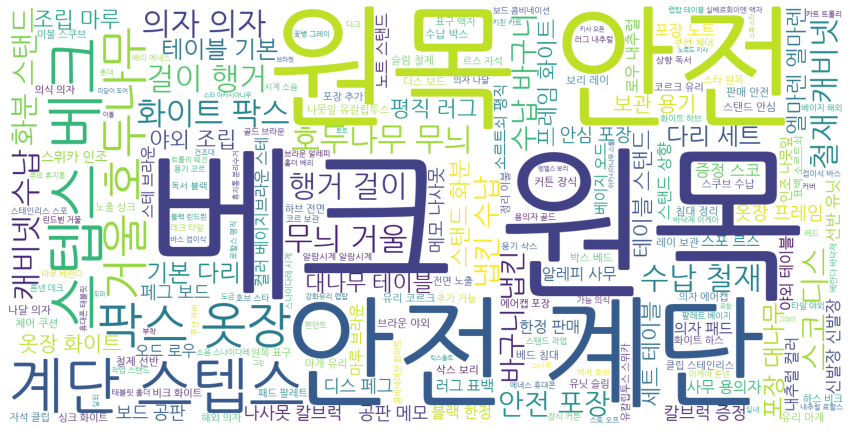

In [166]:
title_wordcloud(prd_ikea['상품명']) # 상품명 

# 5. 분석 결과
상품명
- 한국&아시아 분위기의 상품이어서 그런지, '베크', '원목', '호두나무' 등의 단어 빈도가 높게 나왔다.

#### 결론
- 상품명에서 분위기를 특정할 수 있는 단어를 추출하기 어렵다.
- 상품명에서 분위기를 나타내는 단어보다는 기능적인 단어들이 많이 포함되어 있다.
- 앞으로, 집들이에 포함되지 않은 상품의 분위기는 상품명으로 정의내릴 수 없을 것이다.

#### 앞으로의 목표
- 다른 텍스트 스크래핑이 필요하다.
- 리뷰에서 분위기 단어를 추출해보자.
- 그러면 집들이에 태깅되지 않은 모든 상품들도 분위기를 부여할 수 있을 것이다. 